# **PRÁCTICA 2: AUTOENCODERS - Parte 1: Densos**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos

# Prelaboratorio:



- Lee y entiende la documentación de Keras del modelo funcional:
https://keras.io/getting-started/functional-api-guide/

Tienes ejemplos de ayuda aquí:
https://drive.google.com/drive/folders/1H4Hmz7TfHsmCrtZcQEFfPRenfZun6YYn?usp=sharing

- Lee y entiende los notebooks de la práctica, lánzalos y comprueba que todo funciona bien.

# Laboratorio

## Explicación para mi

<p align="justify">
Típicamente, las redes neuronales profundas son utilizadas en problemas de aprendizaje supervisado. Es decir, a partir de data etiquetada, bien sea con valores continuos (como el precio de un inmueble) o discretos (categorías, como gato o perro), buscamos hallar o aproximar la función que correlaciona entradas y salidas. De manera más sencilla, queremos saber para cada X, cuál es su y correspondiente.</p>

<p align="justify">No obstante, las redes neuronales también albergan el potencial de brillar en contextos donde el conjunto de datos no está etiquetado (aprendizaje no supervisado).</p>

<p align="justify">Unas de las aplicaciones más fascinantes, por no decir útiles, en este respecto es la compresión de información. Para ello, utilizamos un tipo especial de redes neuronales conocidas como autoencoders.</p>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# leer la imagen y preprocesar
img_path = 'encoder-decoder.png'
img = image.load_img(img_path, target_size=(500, 500))

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.title('imagen original')
plt.imshow(img)

<p align="justify">Los autoencoders en vez de correlacionar X e y, lo que buscan es, a partir de una representación reducida de la entrada, reconstruirla. Para ello, cuentan con tres piezas específicas:</p>

- <p align="justify">Codificador (Encoder): Es la porción de la red neuronal encargada de comprimir los datos de entrada, típicamente en forma de vector, conocido como bottleneck feature.</p>

- <p align="justify">Bottleneck feature: Un feature cuello de botella es la capa media que divide al encoder y al decoder. Es la representación comprimida de la entrada, usualmente bastante más pequeña en cuanto a dimensiones e información.</p>

- <p align="justify">Decodificador (Decoder): Es la segunda parte de la red neuronal, a cargo de reconstruir los datos de entrada originales a partir de la representación comprimida resultante del feature cuello de botella.</p>

<p align="justify">En teoría, los autoencoders deberían ser capaces de reproducir la data original sin pérdida de información, pero no suele ser el caso en la práctica, puesto que al convertir la entrada al bottleneck feature es inevitable que prescindamos de información que es difícil de reconstruir por el decoder.</p>

<p align="justify">Sin embargo, es necesario destacar que una de las aplicaciones donde éstas redes neuronales superan las expectativas es reduciendo el ruido en los datos de entrada (como en las imágenes), por lo que se suelen utilizar para mejorar la calidad de, por ejemplo, fotografías en mal estado.</p>

<p align="justify">Así mismo, aunque la red se entrena de principio a fin con la meta de reproducir de la manera más fidedigna posible el dato de entrada, el verdadero valor yace en el bottleneck feature, puesto que para que la misma sea capaz de alcanzar esta meta, dicho vector debe resumir lo suficientemente bien la información de la entrada original como para que la copia regenerada sea lo más similar posible. Por consiguiente, dependiendo del dominio, el decoder actúa más como un mecanismo de entrenamiento que luego es desechado para solo quedarnos con un encoder capaz de producir vectores de alta calidad, representativos de los datos de entrada, permitiéndonos así ahorrar espacio y recursos.</p>

<p align="justify">A continuación implementamos un simple autoencoder basado en capas fully-connected para reconstruir las imágenes del célebre conjunto de datos, MNIST.</p>

Autoencoders con Keras

https://blog.keras.io/building-autoencoders-in-keras.html

## Autoencoder con una capa

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

<p align="justify">Para construir este modelo usando la API funcional, comience creando un nodo de entrada:</p>

In [ ]:
input_img = Input(shape=(784,))



<p align="justify">La forma de los datos se establece como un vector de 784 dimensiones. El tamaño del lote siempre se omite ya que solo se especifica la forma de cada muestra.</p>

<p align="justify">Si queremos agregar algunas capas más al gráfico de capas:</p>

    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(10)(x)
    

In [ ]:
# dimension de dominio intermedio
encoding_dim = 32  
# ENCODER
encoded = Dense(encoding_dim, activation='relu')(input_img)
# DECODER
decoded = Dense(784, activation='sigmoid')(encoded)

En este punto, puede crear un Modelespecificando sus entradas y salidas en el gráfico de capas:

In [ ]:
# AUTOENCODER pasa y devuelve
autoencoder = Model(input_img, decoded)

In [ ]:
# ENCODER
encoder = Model(input_img, encoded)

In [ ]:
# placeholder 
encoded_input = Input(shape=(encoding_dim,)) # entrada del dim encoding
# capa del decoder
decoder_layer = autoencoder.layers[-1] # solo la ultima capa, solo se hace en el simple porque tenemos solo una capa
# Modelo del decoder
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [ ]:
autoencoder.compile(optimizer='adam', loss='MSE', metrics = ['accuracy'])

In [ ]:
autoencoder.summary()

<p align="justify">Mostramos las formas de entrada y salida de cada capa en el gráfico trazado. Esta figura y el código son casi idénticos. En la versión de código, las flechas de conexión se reemplazan por la operación de llamada.</p>

<p align="justify">Un "gráfico de capas" es una imagen mental intuitiva para un modelo de aprendizaje profundo, y la API funcional es una forma de crear modelos que reflejan esto de cerca.</p>

In [ ]:
from tensorflow import keras
keras.utils.plot_model(autoencoder, "my_first_model_with_shape_info.png", show_shapes=True)

**Importando los Datos**

<p align="justify">Dada la enorme popularidad de MNIST, Keras viene equipado con dicho conjunto de datos.</p>

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

**Ojeando los Datos**

<p align="justify">Echemos un vistazo a una de nuestras imágenes de ejemplo.</p>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
image_index = np.random.randint(len((x_train)))
image = x_train[image_index]
plt.imshow(image.reshape((28, 28)), cmap='gray')

In [ ]:
# DATOS
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


**Entrenamiento, evaluación e inferencia**

<p align="justify"> El entrenamiento, la evaluación y la inferencia funcionan exactamente de la misma manera para los modelos creados con la API funcional que para los Sequential modelos.</p>

<p align="justify"> La Model clase ofrece un bucle de entrenamiento integrado (el fit()método) y un bucle de evaluación integrado (el evaluate()método). Tenga en cuenta que puede personalizar fácilmente estos bucles para implementar rutinas de entrenamiento más allá del aprendizaje supervisado (p. ej ., GAN ).</p>

<p align="justify">Los autoencoders son métodos no supervisados, por lo que no se usan etiquetas. La idea es que la entrada y la salida sean los mismos datos. El código de 
lectura de datos y de entrenamiento está bien.</p>

In [ ]:
# ENTRENAMIENTO
history = autoencoder.fit(x_train, x_train, 
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))  

Epoch 1/50
235/235 [==============================] - 4s 5ms/step - loss: 0.0698 - accuracy: 0.0129 - val_loss: 0.0412 - val_accuracy: 0.0143
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.0126 - val_loss: 0.0291 - val_accuracy: 0.0102
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0261 - accuracy: 0.0104 - val_loss: 0.0229 - val_accuracy: 0.0103
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0213 - accuracy: 0.0098 - val_loss: 0.0192 - val_accuracy: 0.0094
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0182 - accuracy: 0.0100 - val_loss: 0.0165 - val_accuracy: 0.0097
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0159 - accuracy: 0.0099 - val_loss: 0.0146 - val_accuracy: 0.0110
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0142 - accuracy: 0.0104 - val_loss: 0.0131 - val_accuracy: 0.0113
Epoch 

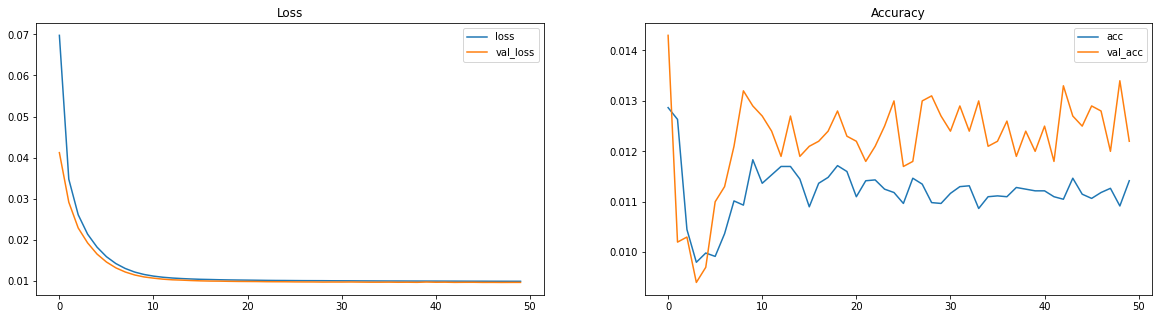

In [ ]:
# Ploteamos la evolucion del loss durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

figure, axis = plt.subplots(1,2, figsize = (20,5))
axis[0].plot(history.history['loss'],label="loss")
axis[0].set_title('Loss')
axis[0].plot(history.history['val_loss'],label="val_loss")
axis[0].legend()

axis[1].plot(history.history['accuracy'],label="acc")
axis[1].set_title('Accuracy')
axis[1].plot(history.history['val_accuracy'],label="val_acc")
axis[1].legend()

plt.show()

In [ ]:
test_scores = autoencoder.evaluate(x_test, x_test, verbose=2)

313/313 - 1s - loss: 0.0096 - accuracy: 0.0122 - 607ms/epoch - 2ms/step


In [ ]:
# APLICACION EN TEST
encoded_imgs = encoder.predict(x_test)
decoded_imgs1 = decoder.predict(encoded_imgs)

# Mismo que
# decoded_imgs = autoencoder.predict(x_test)

### Reconstrucción

<font color='green'><p align="justify"> Esto es lo que obtenemos. La fila superior son los dígitos originales y la fila inferior son los dígitos reconstruidos. Estamos perdiendo un poco de detalle con este enfoque básico.

Test data as input:


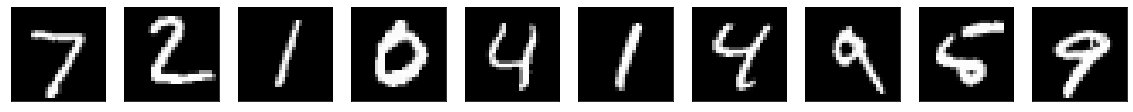

Decoded Image:


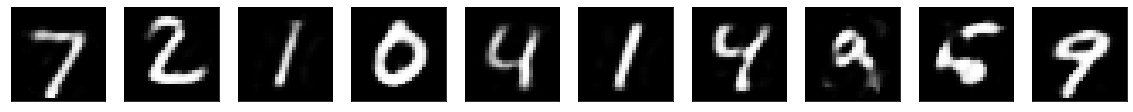

In [ ]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
print("Test data as input:")
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Decoded Image:")
for i in range(n):

    # display reconstruccion
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Aplicaciones

### Limpieza de imágenes ruidosas (random noise)

<p align="justify">Pongamos nuestro codificador automático convolucional a trabajar en un problema de eliminación de ruido de imagen. Es simple: entrenaremos al codificador automático para mapear imágenes de dígitos ruidosos para imágenes de dígitos limpios.</p>

<p align="justify">sí es como generaremos dígitos ruidosos sintéticos: simplemente aplicamos una matriz de ruido gaussiano y recortamos las imágenes entre 0 y 1.</p>

In [ ]:
# Creamos datos ruidosos. Prueba con diferentes fatores 0.2, 0.3, 0.5 para ver como afecta a las imágenes reconstruidas
x_test_nois_02 = x_test + 0.2*np.random.randn(x_test.shape[0],x_test.shape[1])
x_test_nois_03 = x_test + 0.3*np.random.randn(x_test.shape[0],x_test.shape[1])
x_test_nois_05 = x_test + 0.5*np.random.randn(x_test.shape[0],x_test.shape[1])

encoded_imgs_02 = encoder.predict(x_test_nois_02)
decoded_imgs_02 = decoder.predict(encoded_imgs_02)

encoded_imgs_03 = encoder.predict(x_test_nois_02)
decoded_imgs_03 = decoder.predict(encoded_imgs_03)

encoded_imgs_05 = encoder.predict(x_test_nois_05)
decoded_imgs_05 = decoder.predict(encoded_imgs_05)

<p align="justify">Visualemente:</p>

Imágenes originales


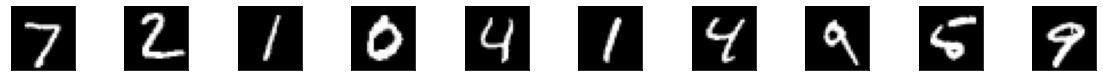

Imágenes ruidosas (random noise = 0.2)


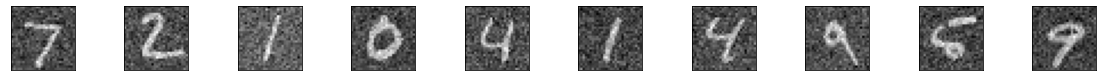

Reconstrucción (salida del decoder = 0.2 ruido):


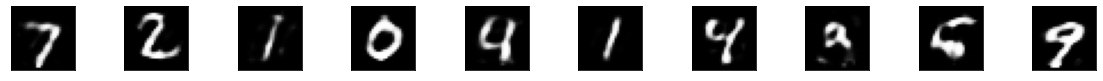

Imágenes ruidosas (random noise = 0.3)


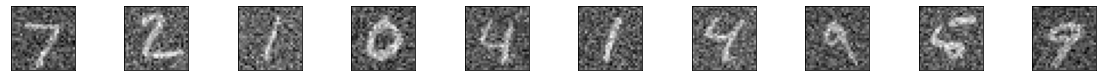

Reconstrucción (salida del decoder = 0.3 ruido):


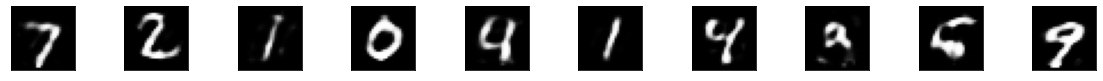

Imágenes ruidosas (random noise = 0.5)


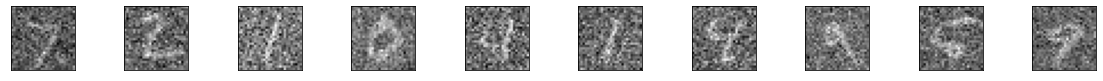

Reconstrucción (salida del decoder = 0.5 ruido):


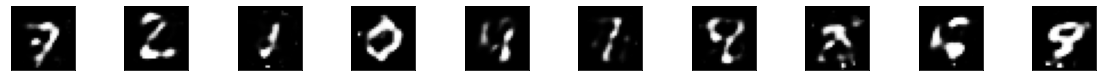

In [ ]:
import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
print("Imágenes originales")
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Imágenes ruidosas (random noise = 0.2)")
for i in range(n):   
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_nois_02[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstrucción (salida del decoder = 0.2 ruido):")
for i in range(n):   
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs_02[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Imágenes ruidosas (random noise = 0.3)")
for i in range(n):   
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_nois_03[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstrucción (salida del decoder = 0.3 ruido):")
for i in range(n):   
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs_03[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Imágenes ruidosas (random noise = 0.5)")
for i in range(n):   
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_nois_05[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstrucción (salida del decoder = 0.5 ruido):")
for i in range(n):   
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs_05[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<p align="justify">Vemos como cuanto más ruido le metemos a la imagen peor procesa la información y recontruye la imagen peor.</p>

### Detección de anomalías

#### Ejemplo con los datos ruidosos

In [ ]:
import numpy as np

<p align="justify"> De la misma manera que antes, vamos a crear datos ruidosos.</p>

In [ ]:
x_test_nois = x_test + 0.5*np.random.randn(x_test.shape[0],x_test.shape[1])

<p align="justify"> Vamos a predecir los datos con ruido con el encoder y el decoder para así sacar el error de predicción de los datos ruidosos.</p>

In [ ]:
encoded_imgs = encoder.predict(x_test_nois)
x_test_nois_pred = decoder.predict(encoded_imgs)
# calculamos el error en los datos normales y ruidosos
error_nois = np.mean(np.abs(x_test_nois-x_test_nois_pred)**2,tuple(range(1, x_test_nois.ndim)))

<p align="justify">De la misma forma ahora con el autoencoder lo que vamos a hacer es predecir los datos sin ruido para sacar el error de predicción de los datos originales.</p>

In [ ]:
x_test_pred = autoencoder.predict(x_test)
error_tes = np.mean(np.abs(x_test-x_test_pred)**2,tuple(range(1, x_test_pred.ndim)))

<p align="justify">Visualizamos lo que acabamos de calcular. Si4endo el color azul el error de las imagenes con ruido y el naranja las imagenes originales. Podemos ver claramente que trabaja mejor los datos sin ruido.</p>

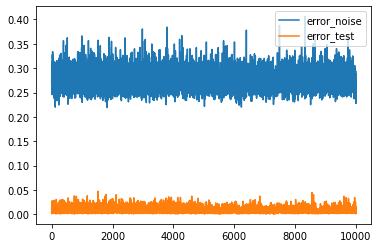

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(error_nois,label="error_noise")
plt.plot(error_tes,label="error_test")
plt.legend()

#### Detectar los dígitos más anómalos de la base de datos (outliers) a partir del error de reconstrucción.

<p align="justify">Para detectar los dígitos más anómalos de la base de datos a partir del error de reconstrucción lo que podemos hacer es mostrar el error en una gráfica. De esta forma podemos detectar los picos con mayor error. Es decir, cada uno de los picos nos muestra el error de predicción de la imagen recostruida y la imagen que le metemos al modelo. Los picos más altos corresponden a aquellas imagenes que peor se han predicho por algú factor (datos anómalos).</p>

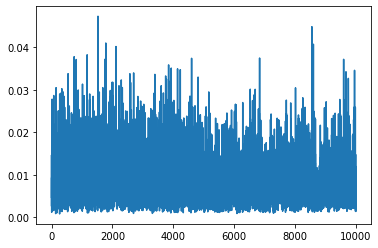

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.figure
plt.plot(error_tes,label="error_test")


<p align="justify">Si queremos saber ahora cuales son estas imagenes para verlas visualmente, lo que hacemos es selecciónar un umbral a partir de ese error de construcción. Esto lo hacemos para así despues poder coger aquellas posiciones de las imágenes.</p>

In [ ]:
#Seleccionar el threshold a partir del error de reconstrucción (por ejemplo  error_test > 0.04)
img_anomala=error_tes>0.038
# Nos devuelve los indices que dan TRUE
index_anomalies=np.where(img_anomala)[0]
print(index_anomalies)

[1170 1526 1782 2118 8553 8602]


<p align="justify">Mostramos las imágenes con mayor error de reconstrucción en la base de datos.</p>

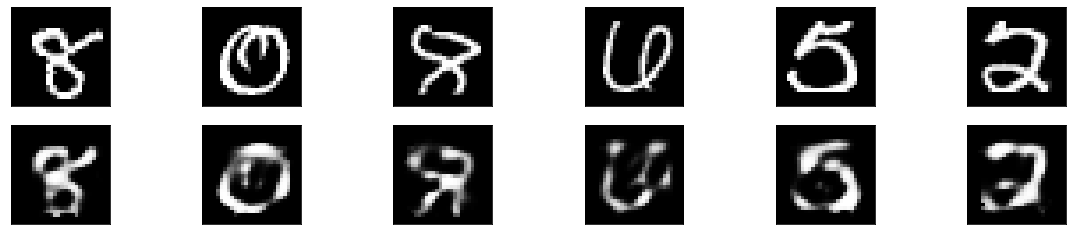

In [ ]:
import matplotlib.pyplot as plt

j=0
plt.figure(figsize=(20, 4))
for i in index_anomalies:
    # display original
    ax = plt.subplot(2, len(index_anomalies), j + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruccion
    ax = plt.subplot(2, len(index_anomalies), j + 1 + len(index_anomalies))
    plt.imshow(decoded_imgs1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    j=j+1
plt.show()

#### Generar imágenes anómalas (outliers) y comprobar que son detectables a partir del error de reconstrucción 

In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# DATOS
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


<p align="justify">Ahora vamos a ver un ejemplo generando una imagen completamente anómala de diversas formas para ver si son posible de detectar y como varía según el tipo de anomalía que le metamos.</p>

In [ ]:
#Distintos tipos de anomalías

# Zero
X_test_anom_zero = x_test.copy()
X_test_anom_zero[1000,:] = np.ones((1,X_test_anom_zero.shape[1]))*0

# Max
X_test_anom_max = x_test.copy()
X_test_anom_max[1000,:] = np.ones((1,X_test_anom_max.shape[1]))*x_test.max()

# Negativo
X_test_anom_neg = x_test.copy()
X_test_anom_neg[1000,:] = np.ones((1,X_test_anom_neg.shape[1]))-X_test_anom_neg[1000,:]

# Multiplicado
X_test_anom_mul = x_test.copy()
X_test_anom_mul[1000,:] = 1.5*X_test_anom_mul[1000,:]

# Ruido
X_test_anom_ruido = x_test.copy()
X_test_anom_ruido[1000,:] = X_test_anom_ruido[1000,:] + 0.5*np.random.randn(1,X_test_anom_ruido.shape[1])

<p align="justify">Vemos visualmente como afectan cada uno de los tipos de anomalías a las imagenes.</p>

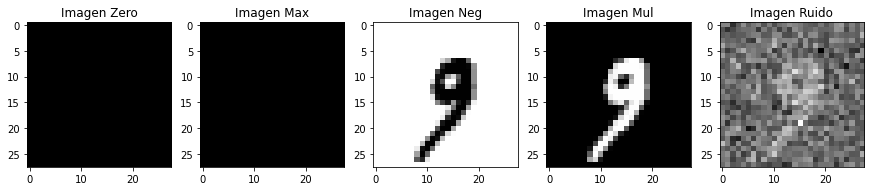

In [ ]:
plt.subplots(figsize=(15,15))

# Zero
plt.subplot(1, 5, 1)
plt.title("Imagen Zero")
plt.imshow(np.reshape(X_test_anom_zero[1000,:],(28,28)))

# Max
plt.subplot(1, 5, 2)
plt.title("Imagen Max")
plt.imshow(np.reshape(X_test_anom_max[1000,:],(28,28)))

# Negativo
plt.subplot(1, 5, 3)
plt.title("Imagen Neg")
plt.imshow(np.reshape(X_test_anom_neg[1000,:],(28,28)))

# Multiplicado
plt.subplot(1, 5, 4)
plt.title("Imagen Mul")
plt.imshow(np.reshape(X_test_anom_mul[1000,:],(28,28)))

# Ruido
plt.subplot(1, 5, 5)
plt.title("Imagen Ruido")
plt.imshow(np.reshape(X_test_anom_ruido[1000,:],(28,28)))

<p align="justify">Predecimos las imagenes a partir de los datos anómalos y calculamos el error de predicción.</p>

In [ ]:
# calculamos el error en los datos reconstruidos
X_test_anom_pred_zero = autoencoder.predict(X_test_anom_zero)
error_tes_zero = np.mean(np.abs(X_test_anom_zero-X_test_anom_pred_zero)**2,axis = 1)

# calculamos el error en los datos reconstruidos
X_test_anom_pred_max = autoencoder.predict(X_test_anom_max)
error_tes_max = np.mean(np.abs(X_test_anom_max-X_test_anom_pred_max)**2,axis = 1)

# calculamos el error en los datos reconstruidos
X_test_anom_pred_neg = autoencoder.predict(X_test_anom_neg)
error_tes_neg = np.mean(np.abs(X_test_anom_neg-X_test_anom_pred_neg)**2,axis = 1)

# calculamos el error en los datos reconstruidos
X_test_anom_pred_mul = autoencoder.predict(X_test_anom_mul)
error_tes_mul = np.mean(np.abs(X_test_anom_mul-X_test_anom_pred_mul)**2,axis = 1)

# calculamos el error en los datos reconstruidos
X_test_anom_pred_ruido = autoencoder.predict(X_test_anom_ruido)
error_tes_ruido = np.mean(np.abs(X_test_anom_ruido-X_test_anom_pred_ruido)**2,axis = 1)

<p align="justify">Vemos como el error varía en función de cada uno de los tipos.</p>

In [ ]:
print("Error en la imagen anómala Zero: ", error_tes_zero[1000])
print("Error en la imagen anómala Max:  ", error_tes_max[1000])
print("Error en la imagen anómala Neg:  ", error_tes_neg[1000])
print("Error en la imagen anómala Mul:  ", error_tes_mul[1000])
print("Error en la imagen anómala Ruido:", error_tes_ruido[1000])

Error en la imagen anómala Zero:  0.0076947073
Error en la imagen anómala Max:   0.9008558
Error en la imagen anómala Neg:   0.8489397
Error en la imagen anómala Mul:   0.032292034
Error en la imagen anómala Ruido: 0.261728


<p align="justify">Además podemos ver error en la imagen 1 de la base de datos. Así podemos comparar con una imagne que no le hemos generado anomalías.</p>

In [ ]:
error_tes[1]

0.014645462

<p align="justify">Visualizamos en un plot el error de construcción para ver si podemos detectar en cada uno de los casos la imágen anónala.</p>

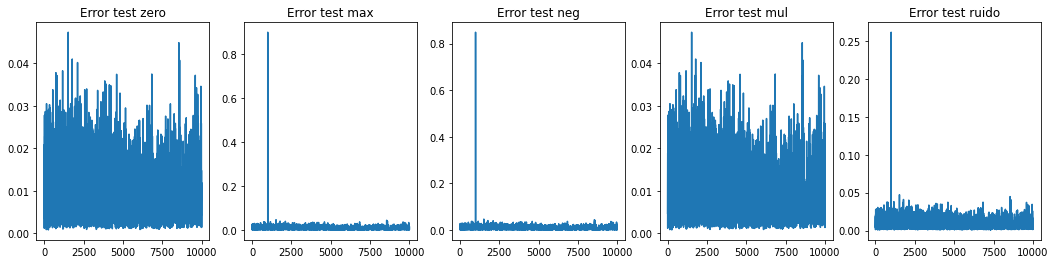

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=5, sharex=True,
                                    figsize=(18, 4))
ax0.set_title('Error test zero')
ax0.plot(error_tes_zero)

ax1.set_title('Error test max')
ax1.plot(error_tes_max)

ax2.set_title('Error test neg')
ax2.plot(error_tes_neg)

ax3.set_title('Error test mul')
ax3.plot(error_tes_mul)

ax4.set_title('Error test ruido')
ax4.plot(error_tes_ruido)
plt.show()